In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [3]:
#Encoder
autoencoder = models.Sequential()
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same'
                             ,input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same'
                              , strides=2, activation='relu'))

#Decoder
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same'
                              , activation='sigmoid'))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [4]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, 
                validation_data=(X_test, X_test))

Epoch 1/50
170/469 [=========>....................] - ETA: 25:12 - loss: 0.2868

KeyboardInterrupt: 

313/313 [==============================] - 1s 3ms/step


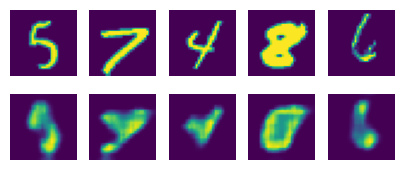

In [6]:
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')

plt.show()